# Analyze Supermarket Data Across the Country - Company XYZ

Company XYZ owns a supermarket chain across the country. Each major branch located in 3 cities across the country recorded sales information for 3 months, to help the company understand sales trends and determine its growth, as the rise of supermarkets competition is seen.

You will apply learnings to analyse the dataset in the data folder, and the description of each feature can be found in this [link](https://docs.google.com/document/d/1Sv-DlynHpOBAs5qKokn5MtbzqZcumTSlSI4-wQ0kf0w/edit?usp=sharing)

## Step 1 - Loading the Dataset
In this step, you will combine the dataset from each branch (3 branches) into one dataset for easy analysis. You expected to write the syntaxes that will read multiple files from your current working directory and export a CSV file after combining. 
The learning from this step is the ability to automate reading and combining multiple CSV files, because as a Data Professional, you will saddled with the responsibility of reading data from different sources, and this is one of the use case.

#### To-Do - Import Libraries

In [1]:
import os
import glob
import pandas as pd
os.getcwd()

'C:\\Users\\User\\Desktop\\project'

In [2]:
os.chdir("C:\\Users\\User\\Desktop\\Data-Analysis-Project-main") #Current working directory that contains your dataset and code file
os.getcwd()

'C:\\Users\\User\\Desktop\\Data-Analysis-Project-main'

#### To-Do - Use glob to match the pattern "csv"

In [6]:
files = glob.glob('*.csv') 
files

['Abuja_Branch.csv', 'Lagos_Branch.csv', 'Port_Harcourt_Branch.csv']

#### To-Do - Combine all the files in the generated list above and export to a CSV
Tips - Use the `pd.concat` method

In [13]:
combined_data = pd.concat([pd.read_csv(f) for f in files], ignore_index=True) 
combined_data.to_csv('All_Branches_Data.csv', index=False)

#### To-Do -Read the CSV file using `pd.read_csv` method

In [14]:
data = pd.read_csv("All_Branches_Data.csv")

## Step 2 - Data Exploration
In this step you will explore the loaded dataset using some built-in Pandas function. You expected to begin to think about your analytical approach from here. 
You can include other methods that you might think will make your exploration process easier. For Instance, you can write a function that print out a summary of the missing data occurence in the data. Be sure to document these methods using `markdown` and in-line `comments`.

### Import Libraries

In [15]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')  
import warnings
warnings.filterwarnings('ignore')

#### To-Do - Use the head() method to view first few rows of the dataset

In [16]:
#[Write your Code Here]
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,2/20/2019,13:27,Card,59227.2,4.761905,2961.36,5.9
1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,2/6/2019,18:07,Epay,20851.2,4.761905,1042.56,4.5
2,529-56-3974,B,Abuja,Member,Male,Electronic accessories,9183.6,4,1836.72,38571.12,3/9/2019,17:03,Cash,36734.4,4.761905,1836.72,6.8
3,299-46-1805,B,Abuja,Member,Female,Sports and travel,33739.2,6,10121.76,212556.96,1/15/2019,16:19,Cash,202435.2,4.761905,10121.76,4.5
4,319-50-3348,B,Abuja,Normal,Female,Home and lifestyle,14508.0,2,1450.80,30466.80,3/11/2019,15:30,Epay,29016.0,4.761905,1450.80,4.4


#### To-Do - Check the number of rows and columns present in the data using the shape attribute.

In [17]:
#[Write your Code Here]
data.shape

(1000, 17)

#### To-Do - Generate the names of the columns using the columns attribute.

In [18]:
#[Write your Code Here]
data.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

#### To-Do - Statiscal Summary
The describe method provides the data statistical summary for the dataset, use the method to explore the statistical summary.

In [19]:
# statistical summary of the dataset excluding the object columns
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,20041.966800,5.510000,5536.572840,116268.029640,110731.456800,4.761905,5536.572840,6.97270
std,9538.066205,2.923431,4215.177173,88518.720636,84303.543463,0.000000,4215.177173,1.71858
min,3628.800000,1.000000,183.060000,3844.260000,3661.200000,4.761905,183.060000,4.00000
25%,11835.000000,3.000000,2132.955000,44792.055000,42659.100000,4.761905,2132.955000,5.50000
50%,19882.800000,5.000000,4351.680000,91385.280000,87033.600000,4.761905,4351.680000,7.00000
75%,28056.600000,8.000000,8080.290000,169686.090000,161605.800000,4.761905,8080.290000,8.50000
max,35985.600000,10.000000,17874.000000,375354.000000,357480.000000,4.761905,17874.000000,10.00000


In [20]:
# statistical summary of the object/categorical(columns) from the dataset
data.describe(include=['O'])

,Invoice ID,Branch,City,Customer type,Gender,Product line,Date,Time,Payment
count,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,3,3,2,2,6,89,506,3
top,745-74-0715,A,Lagos,Member,Female,Fashion accessories,2/7/2019,14:42,Epay
freq,1,340,340,501,501,178,20,7,345


#### To-Do - Below this cell write in few sentences what you can derive from the data statistical summary

#### To-Do - Missing values
The `isnull`, and `notna` methods can provide a quick overview of the missing data occurence, use that to observe the presence of missing data in the dataset. You can add the sum method to get a summary and not boolean values.

In [21]:
#[Write your Code Here]
data.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

#### To-Do - Data Information
The `info()` function is used to print a concise summary of a DataFrame. This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage. Use this method to observe the data type of each feature.

In [22]:
#[Write your Code Here]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

## Step 3 - Dealing with DateTime Features

From the summary above, you can observe that the `date` and `time` columns are not in the appropriate data type
you can convert to `datetime` datatype using the `to_datetime()` method. After that is done, use the type attribute 
to confirm the datatype. 

#### To-Do - Use `to_datetime()` to convert the `date` column to `datetime`

In [23]:
#[Write your Code Here]
data['Date'] = pd.to_datetime(data['Date'])

#### To-Do - Check the datatype to confirm if it's in `datetime`

In [24]:
#[Write your Code Here]
data['Date'].dtype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

#### To-Do - Repeat the two steps above to the `time` column

In [25]:
#[Write your Code Here]
data['Time'] = pd.to_datetime(data['Time'])

## Extract Features from date & time

#### To-Do - Extract the Day feature from the `Date` column, and save to a new `Day` column

In [26]:
#[Write your Code Here]
data['Day'] = data['Date'].dt.day

#### To-Do - Extract the Month feature from the `Date` column, and save to a new `Month` column

In [27]:
#[Write your Code Here]
data['Month'] = data['Date'].dt.month

#### To-Do -Extract the Year feature from the `Date` column, and save to a new `Year` column  

In [28]:
#[Write your Code Here]
data['Year'] = data['Date'].dt.year

#### To-Do - Extract the `Hour` feature from the `Time` column and save to a new `Hour` column

In [29]:
#[Write your Code Here]
data['Hour'] = data['Time'].dt.hour

#### Pandas provide the `nunique()` method to get a count of unique values, while the `unique()` function is used to get unique values of Series object.

#### To-Do -  From the hours information, determine the numbers of unique hours of sales in the supermarket, and return an array of the hours using the unique() method

In [30]:
#[Write your Code Here]
data['Hour'].nunique()

11

In [31]:
#[Write your Code Here]
data['Hour'].unique()

array([13, 18, 17, 16, 15, 10, 12, 19, 14, 11, 20], dtype=int64)

## Step 4 - Unique Values in Columns

With the line of code below, we can get a list of the categorical column in the dataset. We iterate through the columns and check if each element is an object datatype. The result is saved to the "categorical_columns" variable
as a list.

In [32]:
#Uncomment the code and Run it
categorical_columns = [col for col in data.columns if data[col].dtype == "object" ]
categorical_columns

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Payment']

#### To-Do- From the information above, generate the unique values in the categorical columns (apart from the example - Branch column).
For example, the unique values of the "Branch" column is displayed in list, as shown below.
<br/>
`df['Branch'].unique().tolist()
['B', 'C', 'A']`
</br>
<br/>
You can add print formating syntax to print out the total numbers of these values in a particular column. 

In [33]:
#Example - Uncomment the Code and Run it
data['Invoice ID'].unique().tolist()
print("Total Number of unique values in the Invoice ID Column : {}". format(len(data['Invoice ID'].unique().tolist())))

Total Number of unique values in the Invoice ID Column : 1000


In [34]:
print(data['City'].unique().tolist())
print("Total Number of unique values in the City Column : {}". format(len(data['City'].unique().tolist())))

['Abuja', 'Lagos', 'Port Harcourt']
Total Number of unique values in the City Column : 3


In [35]:
print(data['Customer type'].unique().tolist())
print("Total Number of unique values in the Customer type Column : {}". format(len(data['Customer type'].unique().tolist())))

['Member', 'Normal']
Total Number of unique values in the Customer type Column : 2


In [36]:
print(data['Product line'].unique().tolist())
print("Total Number of unique values in the Product line Column : {}". format(len(data['Product line'].unique().tolist())))

['Food and beverages', 'Fashion accessories', 'Electronic accessories', 'Sports and travel', 'Home and lifestyle', 'Health and beauty']
Total Number of unique values in the Product line Column : 6


In [37]:
print(data['Gender'].unique().tolist())
print("Total Number of unique values in the Gender Column : {}". format(len(data['Gender'].unique().tolist())))

['Female', 'Male']
Total Number of unique values in the Gender Column : 2


In [38]:
print(data['Payment'].unique().tolist())
print("Total Number of unique values in the Payment Column : {}". format(len(data['Payment'].unique().tolist())))

['Card', 'Epay', 'Cash']
Total Number of unique values in the Payment Column : 3


#### To-Do: The `value_counts()` function is used to get a Series containing counts of unique values. For the categorical columns above, generate the count figure of the values using the `value_counts() ` method.


In [39]:
#Example
data['Branch'].value_counts()

A    340
B    332
C    328
Name: Branch, dtype: int64

In [40]:
data[categorical_columns].value_counts()

Invoice ID   Branch  City           Customer type  Gender  Product line         Payment
101-17-6199  A       Lagos          Normal         Male    Food and beverages   Card       1
641-62-7288  B       Abuja          Normal         Male    Home and lifestyle   Epay       1
633-91-1052  A       Lagos          Normal         Female  Home and lifestyle   Cash       1
634-97-8956  A       Lagos          Normal         Male    Food and beverages   Card       1
635-28-5728  A       Lagos          Normal         Male    Health and beauty    Epay       1
                                                                                          ..
373-14-0504  A       Lagos          Member         Female  Sports and travel    Epay       1
373-73-7910  A       Lagos          Normal         Male    Sports and travel    Epay       1
373-88-1424  C       Port Harcourt  Member         Male    Home and lifestyle   Epay       1
374-17-3652  B       Abuja          Member         Female  Food and beverag

## Step 5 - Aggregration with GroupBy

#### To-Do - Your task here, will be to create a groupby object with the "City Column", and aggregation function of sum and mean. 

In [41]:
#[Write your Code Here]
data.groupby('City').agg(['sum', 'mean'])

Unit price               Quantity                Tax 5%  \
                     sum          mean      sum      mean         sum   
City                                                                    
Abuja          6652396.8  20037.339759     1820  5.481928  1820531.52   
Lagos          6705176.4  19721.107059     1859  5.467647  1820577.78   
Port Harcourt  6684393.6  20379.248780     1831  5.582317  1895463.54   

                                  Total                       cogs  \
                      mean          sum           mean         sum   
City                                                                 
Abuja          5483.528675  38231161.92  115154.102169  36410630.4   
Lagos          5354.640529  38232133.38  112447.451118  36411555.6   
Port Harcourt  5778.852256  39804734.34  121355.897378  37909270.8   

                              ...  Rating             Day            Month  \
                        mean  ...     sum      mean   sum       mean   sum   
City                          ...                                            
Abuja          109670.573494  ...  2263.6  6.818072  5068  15.265060   665   
Lagos          107092.810588  ...  2389.2  7.027059  5232  15.388235   688   
Port Harcourt  115577.045122  ...  2319.9  7.072866  4956  15.109756   640   

                           Year        Hour             
                   mean     sum  mean   sum       mean  
City                                                    
Abuja          2.003012  670308  2019  5029  15.147590  
Lagos          2.023529  686460  2019  4987  14.667647  
Port Harcourt  1.951220  662232  2019  4894  14.920732  

[3 rows x 24 columns]

#### To-Do - Using the groupby object, display a table that shows the gross income of each city, and determine the city with the highest total gross income.

In [42]:
#[Write your Code Here]
data.groupby("City")['gross income'].sum()

City
Abuja            1820531.52
Lagos            1820577.78
Port Harcourt    1895463.54
Name: gross income, dtype: float64

In [43]:
# [Write your Answer Here]
data.groupby("City")['gross income'].sum().max()

1895463.539999999

In [37]:
# Optional - You can explore other columns such as "Unit Price", "Quantity" etc. 

In [46]:
data.groupby("City")['Unit price'].sum()

City
Abuja            6652396.8
Lagos            6705176.4
Port Harcourt    6684393.6
Name: Unit price, dtype: float64

In [44]:
data.groupby("City")['Unit price'].sum().max()

6705176.3999999985

In [47]:
data.groupby("City")['Quantity'].sum()

City
Abuja            1820
Lagos            1859
Port Harcourt    1831
Name: Quantity, dtype: int64

In [45]:
data.groupby("City")['Quantity'].sum().max()

1859

## Step 6 - Data Visualization

In this section, you will provide answer to some questions by generating charts and making use of different plotting styles. You will use the `Seaborn visualization` library to generate your plots. For all visualizations, include a chart title by using the seaborn `set_title` method

#### To-Do- Using `countplot`, determine the branch with the highest sales record. Optional - You can extend this to determine - most used payment method, city with the most sales

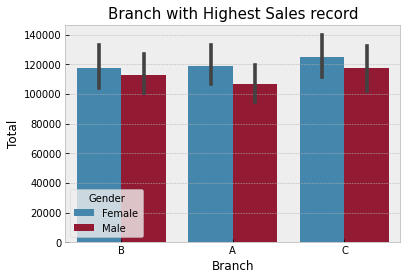

In [48]:
#[Write your Code Here]
sns.barplot(x='Branch', y = 'Total', hue ='Gender', data=data)
plt.title("Branch with Highest Sales record", fontsize=15)
plt.show()

The chart above shows that Branch C(Port-Harcourt) has the  highest sales with female having the higher value

Text(0.5, 1.0, 'Customer Type with highest Sales in different Branch')

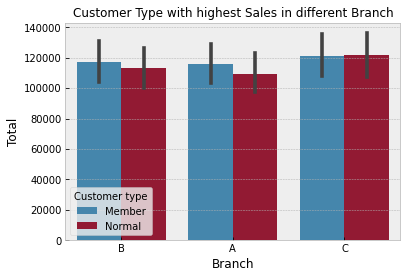

In [49]:
sns.barplot(x='Branch', y = 'Total', hue ='Customer type', data=data)
plt.title("Customer Type with highest Sales in different Branch", fontsize=12)

In Branch C, normal member that patronised the supermarket has increased in population compared to  the register Member. we suggest that they should continue with the step taken to get all these attention and introduce those steps to other branch as well.

#### Explore a countplot for the `Payment` and `City` Column

Text(0.5, 1.0, 'Highest Payment Method')

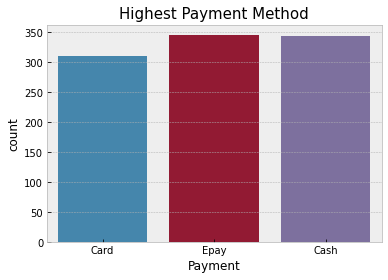

In [50]:
sns.countplot('Payment', data=data)
plt.title("Highest Payment Method", fontsize=15)

Text(0.5, 1.0, 'showing the 3 different cities')

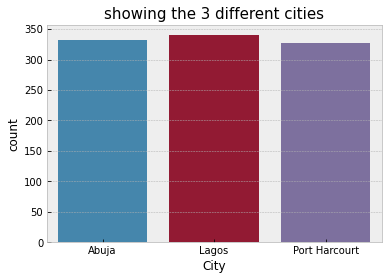

In [51]:
sns.countplot('City', data=data)
plt.title("showing the 3 different cities", fontsize=15)

Text(0.5, 1.0, '3 different cities with payment method')

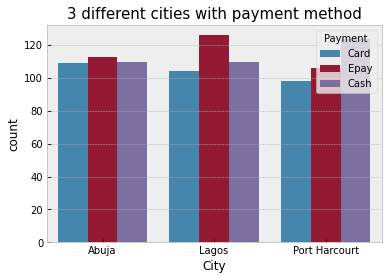

In [52]:
sns.countplot('City', data=data, hue='Payment')
plt.title("3 different cities with payment method", fontsize=15)

#### To-Do - Determine the highest & lowest sold product line, using Countplot 
Count Plot Tips- Set the `Product line` column to y-axis to prevent congestion on the x-axis

Text(0.5, 1.0, 'Displaying different products')

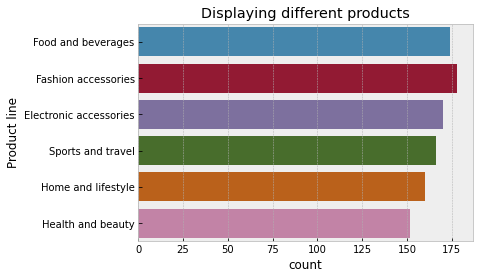

In [53]:
#[Write your Code Here]
sns.countplot(y = "Product line", data=data)
plt.title("Displaying different products")

Fashion accessories has the highest product with the value of 178, followed by food and beverages

#### To-Do -  Determine the Payment channel used by most customer to pay for each product line. Count Plot Tips- Set the "product line" column to y-axis to prevent congestion on the x-axis, and use the "hue" parameter for the "Payment" column. 

Text(0.5, 1.0, 'Displaying payment channel used by customer for each product')

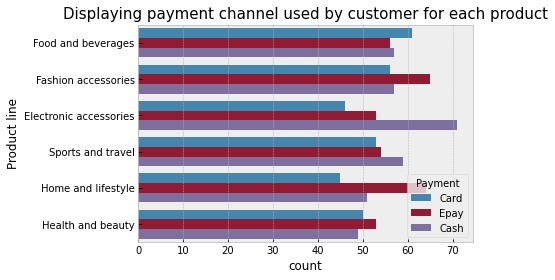

In [54]:
#[Write your Code Here]
sns.countplot(y='Product line', data=data, hue='Payment')
plt.title("Displaying payment channel used by customer for each product", fontsize=15)

#### To-Do- Determine the Payment channel for each branch.
Count Plot Tips - Use the hue parameter for the "branch" column

Text(0.5, 1.0, 'Displaying payment channel used in different branches')

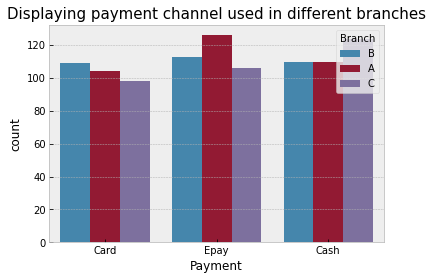

In [55]:
#[Write your Code Here]
sns.countplot('Payment', hue='Branch', data=data)
plt.title("Displaying payment channel used in different branches", fontsize=15)

#### To-Do- Determine the branch with the lowest rating. This you can determine using abox plot which gives a statistical summary of the plotted features, and you can pick out the branch with the lowest rating from the plot

Text(0.5, 1.0, 'Showing different branches and thier rating level')

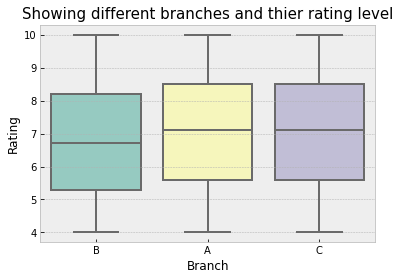

In [57]:
#[Write your Code Here]
sns.boxplot(x="Branch", y="Rating", data=data, palette="Set3")
plt.title("Showing different branches and thier rating level", fontsize=15)

#### To-Do - The gender type often affects the kind of products being purchased at the supermarket. 
* Using a catplot() generate visualization for the "product line" on x-axis, quantity on the y-axis, and hue as gender. 
<br/>

#### Set the aspect parameter to 4, so can you can effectively space out each product line. 



* Plot the same chart, but `Total Column` as the y-axis

* Write a summary of the insights you can pick from this chart.

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Food and beverages'),
  Text(1, 0, 'Fashion accessories'),
  Text(2, 0, 'Electronic accessories'),
  Text(3, 0, 'Sports and travel'),
  Text(4, 0, 'Home and lifestyle'),
  Text(5, 0, 'Health and beauty')])

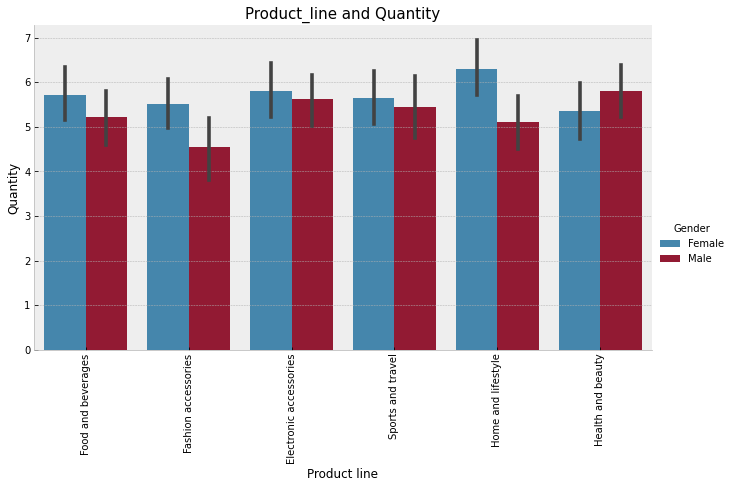

In [58]:
#[Write your Code Here]
sns.catplot(x = 'Product line', y = 'Quantity', hue='Gender', data=data, aspect=4, kind='bar')
plt.title("Product_line and Quantity", fontsize=15)
plt.xticks(rotation=90)

The catplot above showed that `female` purchased all Product_line than `male` except for `health and beauty product`.

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Food and beverages'),
  Text(1, 0, 'Fashion accessories'),
  Text(2, 0, 'Electronic accessories'),
  Text(3, 0, 'Sports and travel'),
  Text(4, 0, 'Home and lifestyle'),
  Text(5, 0, 'Health and beauty')])

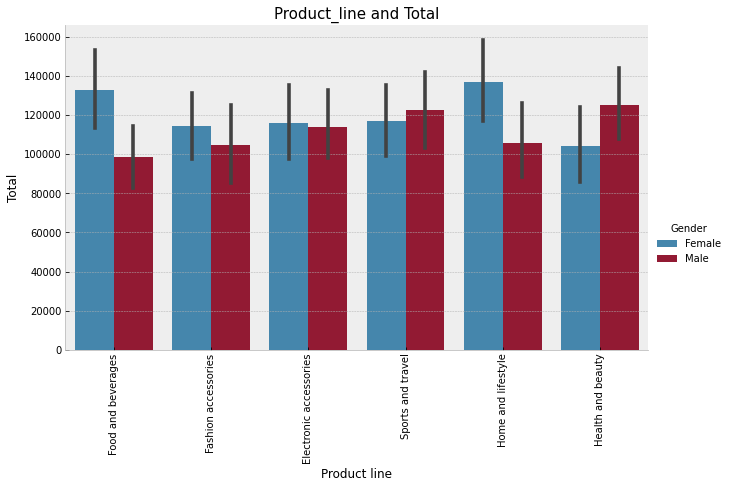

In [59]:
#[Write your Code Here]
sns.catplot(x = 'Product line', y = 'Total', hue='Gender', data=data, aspect=4, kind='bar')
plt.title("Product_line and Total", fontsize=15)
plt.xticks(rotation = 90)

`Female` has the highest `total price` for all product except for `health and beauty`, and `sport and travel` where male has the highest total price

#### To-Do -  An interesting insight to explore is the interaction of Unit price on the Quantity of goods purchased. To achieve this: 
* Use the `catplot()` to plot `Product line per unit price`, and `Product line per Quantity`. Set the kind parameter to `point` 
* In a new cell, Write a summary of the insights you uncovered

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Food and beverages'),
  Text(1, 0, 'Fashion accessories'),
  Text(2, 0, 'Electronic accessories'),
  Text(3, 0, 'Sports and travel'),
  Text(4, 0, 'Home and lifestyle'),
  Text(5, 0, 'Health and beauty')])

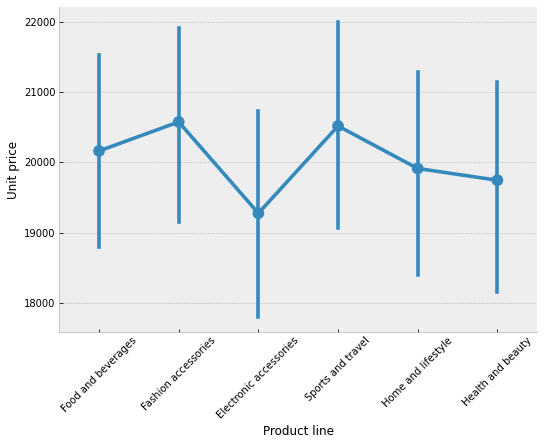

In [60]:
#[Write your Code Here]
sns.catplot(x='Product line', y = 'Unit price', data=data, aspect=1.5, kind='point')
plt.xticks(rotation=45)

`Electronic accessories` has the `lowest` unit price while `fashion accessories` has the `highest` unit price, followed by `Sports and travel`. 

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Food and beverages'),
  Text(1, 0, 'Fashion accessories'),
  Text(2, 0, 'Electronic accessories'),
  Text(3, 0, 'Sports and travel'),
  Text(4, 0, 'Home and lifestyle'),
  Text(5, 0, 'Health and beauty')])

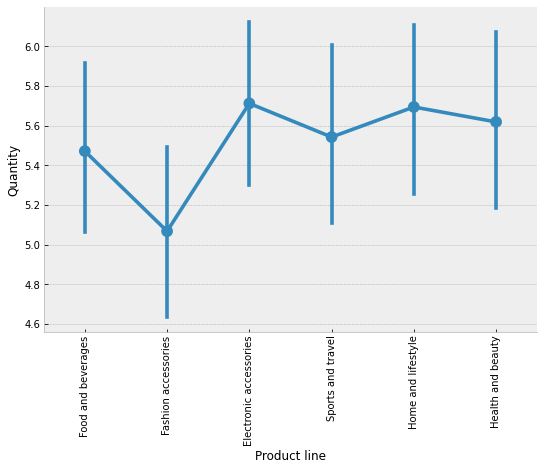

In [61]:
sns.catplot(x='Product line', y = 'Quantity', data=data, aspect=1.5, kind='point')
plt.xticks(rotation=90)

`Fashion accessories` has the lowest quantity while `Electronic accessories` has the highest quantity.

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Food and beverages'),
  Text(1, 0, 'Fashion accessories'),
  Text(2, 0, 'Electronic accessories'),
  Text(3, 0, 'Sports and travel'),
  Text(4, 0, 'Home and lifestyle'),
  Text(5, 0, 'Health and beauty')])

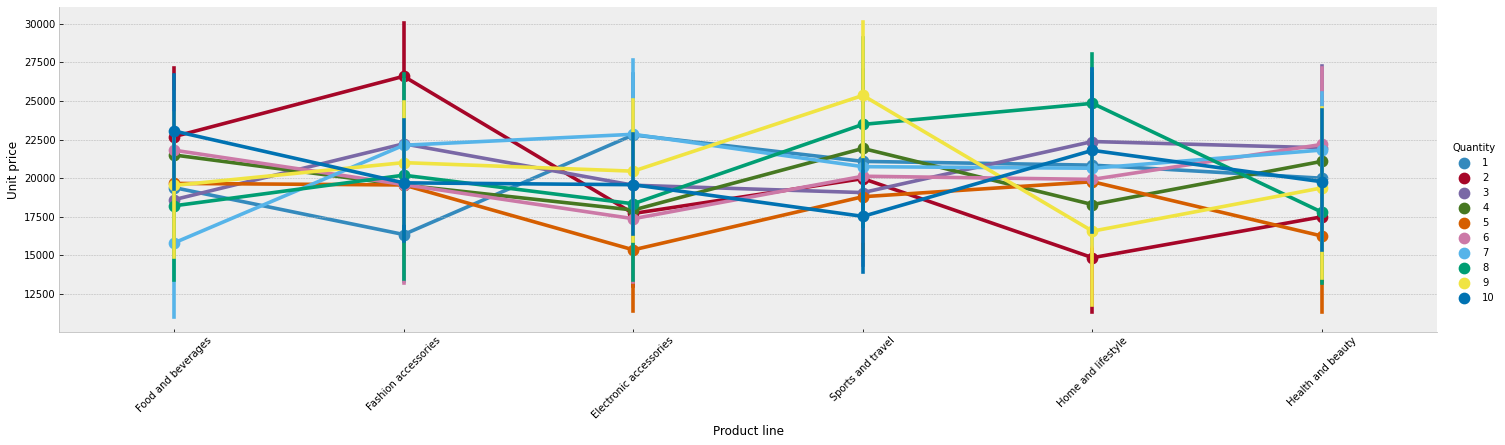

In [93]:
sns.catplot(x='Product line', y = 'Unit price', hue = 'Quantity', data=data, aspect=4.0, kind='point')
plt.xticks(rotation=45)

In [54]:
#[Write your Code Here]

## Step 7 - StandOut Section
To make your submission standout, 
* You can continue to explore more insights that can be uncovered with different plotting methods.
* Write a detailed summary on your approach, methods and insights. 
* Visit the [link](https://seaborn.pydata.org/tutorial/categorical.html) for more Seaborn visualization plots.


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Food and beverages'),
  Text(1, 0, 'Fashion accessories'),
  Text(2, 0, 'Electronic accessories'),
  Text(3, 0, 'Sports and travel'),
  Text(4, 0, 'Home and lifestyle'),
  Text(5, 0, 'Health and beauty')])

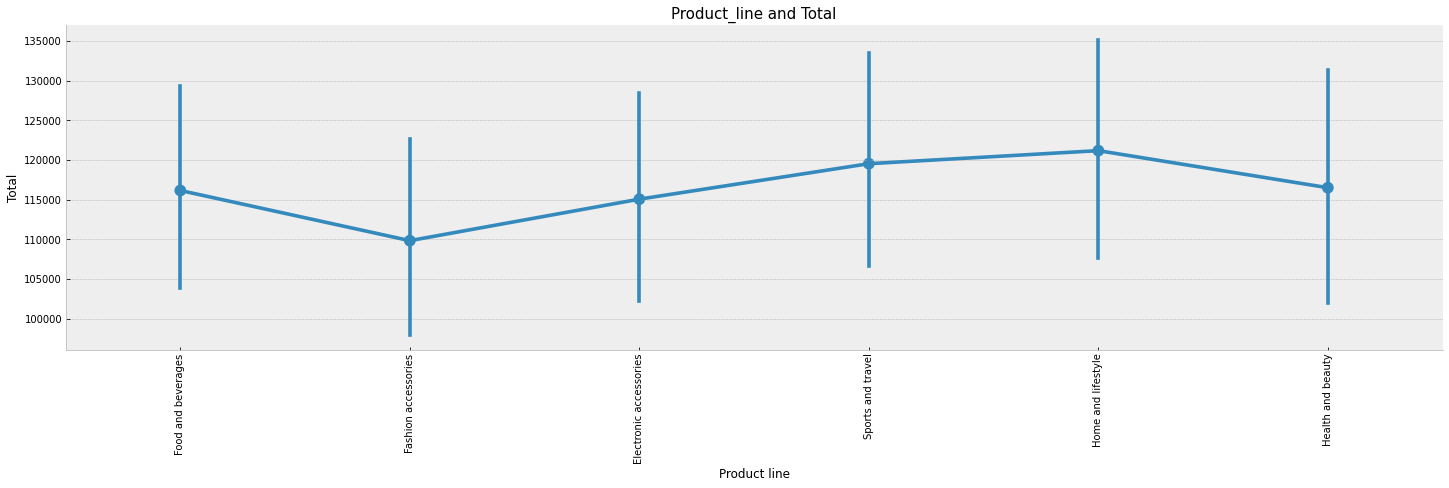

In [94]:
sns.catplot(x = 'Product line', y = 'Total', data=data, aspect=4, kind='point')
plt.title("Product_line and Total", fontsize=15)
plt.xticks(rotation=90)

This chart showed that Home and lifestyle product has the highest total price, followed by sports and travel

In [91]:
import plotly_express as px
fig = px.area(data, x='Product line', y='Total')
fig.show()

## Time series

In [72]:
df = pd.read_csv("All_Branches_Data.csv", parse_dates=['Date'], index_col='Date')

When importing the file to a pandas dataframe,we to specify the:
- date column using the parameter `parse_dates`
- datetime index using the parameter `index_col`

In [73]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,,,,,,,,,
2019-02-20,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,13:27,Card,59227.2,4.761905,2961.36,5.9
2019-02-06,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,18:07,Epay,20851.2,4.761905,1042.56,4.5
2019-03-09,529-56-3974,B,Abuja,Member,Male,Electronic accessories,9183.6,4,1836.72,38571.12,17:03,Cash,36734.4,4.761905,1836.72,6.8
2019-01-15,299-46-1805,B,Abuja,Member,Female,Sports and travel,33739.2,6,10121.76,212556.96,16:19,Cash,202435.2,4.761905,10121.76,4.5
2019-03-11,319-50-3348,B,Abuja,Normal,Female,Home and lifestyle,14508.0,2,1450.80,30466.80,15:30,Epay,29016.0,4.761905,1450.80,4.4


In [74]:
df.index

DatetimeIndex(['2019-02-20', '2019-02-06', '2019-03-09', '2019-01-15',
               '2019-03-11', '2019-03-05', '2019-03-15', '2019-02-08',
               '2019-01-25', '2019-02-25',
               ...
               '2019-01-09', '2019-03-18', '2019-03-30', '2019-02-07',
               '2019-01-19', '2019-01-23', '2019-01-09', '2019-03-29',
               '2019-02-18', '2019-01-29'],
              dtype='datetime64[ns]', name='Date', length=1000, freq=None)

#### `resample()` is a method of pandas dataframes that can be used to summarize data by date or time

In [77]:
df.Total.resample('M').sum()

Date
2019-01-31    41865072.48
2019-02-28    34998974.64
2019-03-31    39403982.52
Freq: M, Name: Total, dtype: float64

The data above showed total monthly sales for the 3 months in 2019, `January` has the highest sales of `41865072.48`, followed by `March` with the total sales of `39403982.52` and `February` with the total sales of `34998974.64`.

In [79]:
df.Total.resample('M').mean()

Date
2019-01-31    118934.865000
2019-02-28    115508.167129
2019-03-31    114214.442087
Freq: M, Name: Total, dtype: float64

In [78]:
df.Total.resample('D').min()

Date
2019-01-01    40884.48
2019-01-02    16053.66
2019-01-03    15966.72
2019-01-04    27280.26
2019-01-05    12058.20
                ...   
2019-03-26    14787.36
2019-03-27    33056.10
2019-03-28    26671.68
2019-03-29    43606.08
2019-03-30    30784.32
Freq: D, Name: Total, Length: 89, dtype: float64

<AxesSubplot:xlabel='Date'>

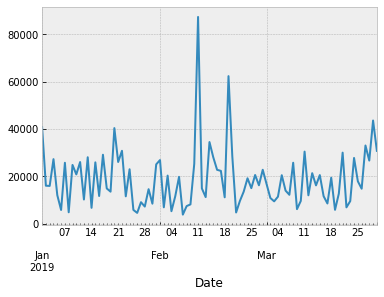

In [80]:
df.Total.resample('D').min().plot()

The graph above shows daily minimum sales, there was a `spike of sales` in the `second and the third week` of `February` with the minimum sales of `90,000+` and `60,000+` respectively.

<AxesSubplot:xlabel='Date'>

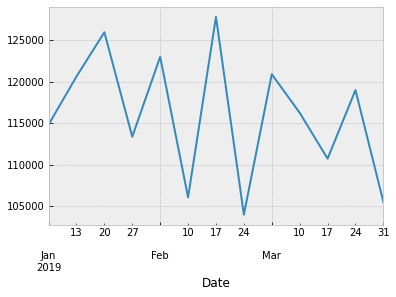

In [81]:
df.Total.resample('W').mean().plot()

<AxesSubplot:xlabel='Date'>

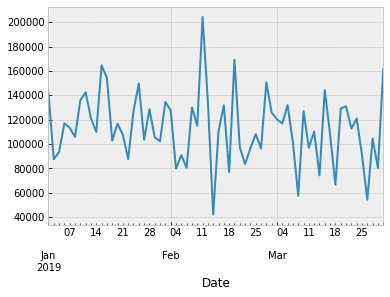

In [68]:
df.Total.resample('B').mean().plot()

The `D` specifies that you want to aggregate, or resample, by `day`.
The `M` specifies that you want to aggregate, or resample, by `Monthly`.
The `W` specifies that you want to aggregate, or resample, by `Weekly`.
The `B` specifies that you want to aggregate, or resample, by `Business Day`. #excluding holiday

<AxesSubplot:xlabel='Date'>

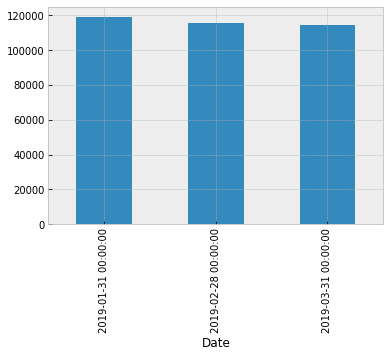

In [83]:
df.Total.resample('M').mean().plot(kind='bar')

<AxesSubplot:ylabel='Date'>

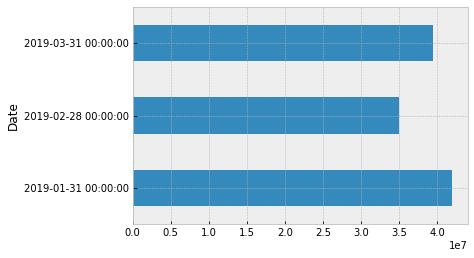

In [84]:
df.Total.resample('M').sum().plot(kind='barh')

The highest sales occurred in the monthly of January, though there was spike in february yet Feb. has the lowest sales. This can be due to incomplete days.

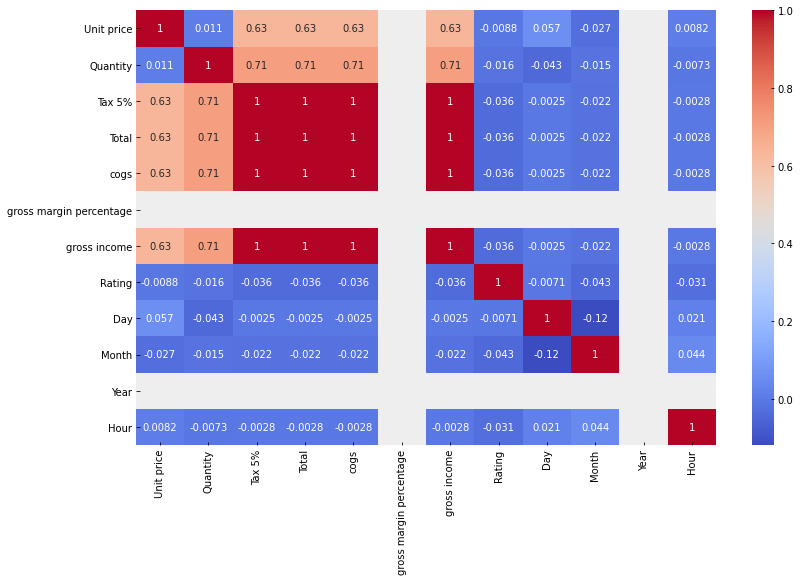

In [95]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (13, 8))

#plot heat map
g = sns.heatmap(data[top_corr_features].corr(), annot = True, cmap='coolwarm')

## Step 8 - Documentation.

* Write a detailed `ReadMe` that describes the project, explains important approach you followed to solve the tasks. Find a template in the starter file that can get you started quickly. Note: Do limit yourself to the template, you can include any interesting step that is worth sharing. 
* Write an Executive summary that you can present to `Company XYZ` management. The summary will explain your processes and insights you uncovered that can help the company 